# Project Summary
Bank X aims to increase its borrower base to boost loan interest revenue. A recent marketing campaign had a single-digit conversion rate; the goal is to reach double digits without increasing the budget. This project will develop a machine learning model to predict potential customers likely to convert, using historical data. Targeting these high-probability customers will improve marketing efficiency and drive business growth.

# Importing and reading data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df1 = pd.read_excel('/content/Data1.xlsx')
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [ ]:
df2 = pd.read_excel('/content/Data2.xlsx')
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [ ]:
print('Shape of df1:',df1.shape)
print('Shape of df2:',df2.shape)

Shape of df1: (5000, 8)
Shape of df2: (5000, 7)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


# Merge Dataframes on 'ID' to form a single Dataframe

In [ ]:
# Merge both the Dataframes
df_cust = pd.merge(df1,df2, on="ID", how="inner")
df_cust.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
df_cust.shape

(5000, 14)

# Changing Datatype of below feature to 'Object' type

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [ ]:
# Changing the specific columns to object data type
for col in ["CreditCard", "InternetBanking", "FixedDepositAccount", "Security", "Level", "HiddenScore"]:
    df_cust[col] = df_cust[col].astype(object)

# Updated columns
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


# Data Analysis

In [ ]:
#Checking counts of unique target values of LoanOnCard
df_cust["LoanOnCard"].value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

<Axes: xlabel='LoanOnCard', ylabel='count'>

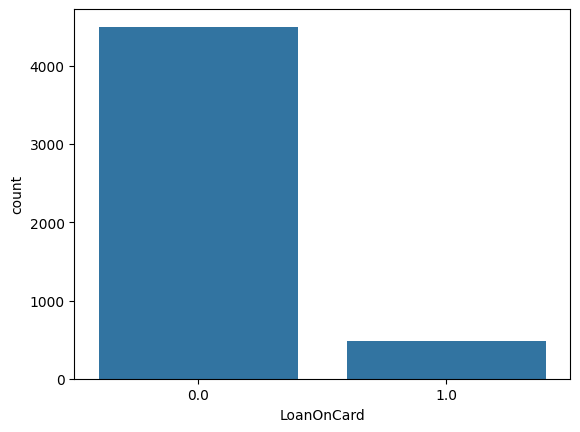

In [ ]:
# Visualizing the distribution
sns.countplot(data=df_cust, x='LoanOnCard')

In [ ]:
# Check for null-values
df_cust['LoanOnCard'].isna().sum()

20

# Checking Null Values

In [ ]:
# % of missing values
print(df_cust['LoanOnCard'].isna().sum()/len(df_cust['LoanOnCard'])*100)

0.4


In [ ]:
df_cust.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
# As only one column has less number of missing values, it can be dropped
df_cust.dropna(inplace=True)
df_cust.shape

(4980, 14)

In [ ]:
df_cust.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [ ]:
# Verifying if categorical variables only has numerical values
for col in df_cust.select_dtypes(object).columns:
  print(col, df_cust[col].unique())

HiddenScore [1 4 3 2]
Level [3 2 1]
Security [0 1]
FixedDepositAccount [0 1]
InternetBanking [0 1]
CreditCard [0 1]


# Data preparation and model building

In [ ]:
# Converting target variable datatype from float to int
y = df_cust['LoanOnCard'].astype('int')
y

9       1
10      0
11      0
12      0
13      0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: LoanOnCard, Length: 4980, dtype: int64

In [ ]:
# Dropping ID and Zipcode columns. Dropping LoanOnCard column too for splitting of data for training purpose
x = df_cust.drop(columns=["ID", "ZipCode","LoanOnCard"])
x

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,1,8.9,3,0,0,0,0,0
10,65,39,105,4,2.4,3,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0
12,48,23,114,2,3.8,3,0,1,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


# Training and Testing Data Splitting

In [ ]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3735, 11), (1245, 11), (3735,), (1245,))

# Training with Logistic Regression Model

In [ ]:
# Train with Logisitic Regression Model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

logit_model = LogisticRegressionCV()
logit_model.fit(x_train, y_train)
logit_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
# Function to summarise the evaluation of performance
def evaluation(model):
  from sklearn import metrics
  cm = confusion_matrix(y_test, model.predict(x_test))
  print("Train Accuracy:", model.score(x_train, y_train))
  print()
  print("Test Accuracy:", model.score(x_test, y_test))
  print()
  print("Confusion Matrix:\n", cm)
  print()
  print('Classification report of '+ str(model)+' model is')
  print(classification_report(y_test, model.predict(x_test)))
  print()
  print('AUC Score is',metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
  print()
  print('Heatmap of Confusion Matrix')
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax ,cmap=plt.cm.Blues, fmt="d")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix', fontsize=14)

Train Accuracy: 0.951004016064257

Test Accuracy: 0.9518072289156626

Confusion Matrix:
 [[1104   14]
 [  46   81]]

Classification report of LogisticRegressionCV() model is
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1118
           1       0.85      0.64      0.73       127

    accuracy                           0.95      1245
   macro avg       0.91      0.81      0.85      1245
weighted avg       0.95      0.95      0.95      1245


AUC Score is 0.9578549997887116

Heatmap of Confusion Matrix


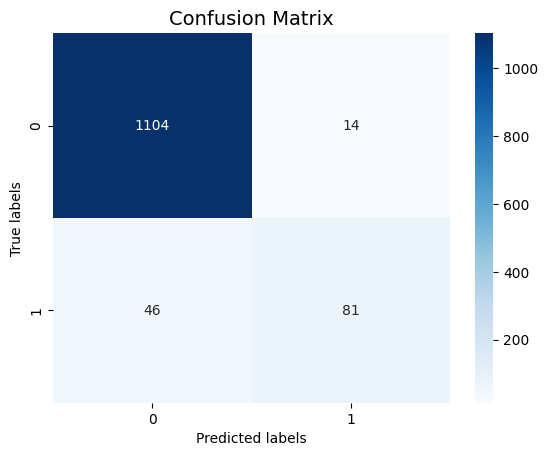

In [ ]:
# Accuracy score for training data
evaluation(logit_model)

# Balancing the Data

In [ ]:
# Accuracy is good
# But as the target variable is unbalanced, trying with balancing the data and evaluating the performance

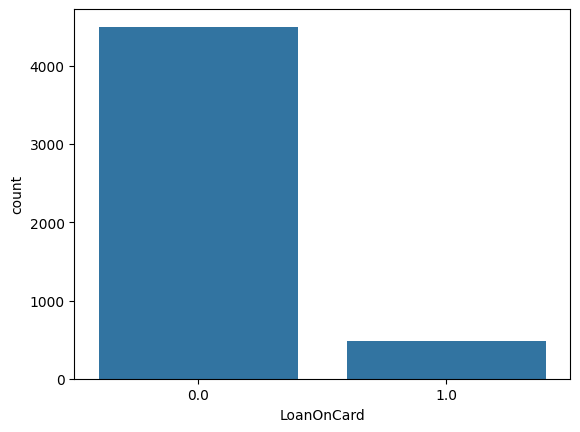

In [ ]:
sns.countplot(data=df_cust, x='LoanOnCard');

In [ ]:
(y.value_counts()/len(y)*100)

LoanOnCard
0    90.361446
1     9.638554
Name: count, dtype: float64

In [ ]:
# Using oversampling technique
class_0 = df_cust[df_cust['LoanOnCard'] == 0]
class_1 = df_cust[df_cust['LoanOnCard'] == 1]
class_0.shape, class_1.shape

((4500, 14), (480, 14))

In [ ]:
# Random oversampling
class_1 = class_1.sample(4500, replace=True, random_state=1)
class_1.shape

(4500, 14)

In [ ]:
df_bal = pd.concat([class_0, class_1], axis=0)
df_bal

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
14,15,67,41,112,91741,1,2.0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1178,28,3,71,90405,1,3.3,2,149,1,1,1,0,1.0
4628,4629,27,1,130,94801,3,2.9,2,0,0,0,0,0,1.0
965,966,62,36,135,94301,2,5.2,2,0,0,0,1,0,1.0
3033,3034,43,19,130,90630,2,4.7,3,221,0,0,0,1,1.0


<Axes: xlabel='LoanOnCard', ylabel='count'>

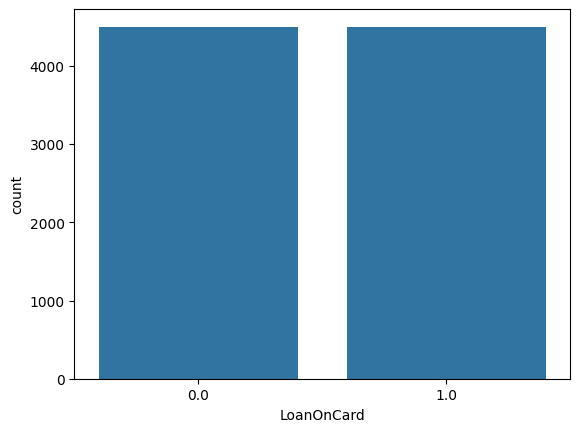

In [ ]:
# Verifying balanced classes
sns.countplot(data=df_bal, x='LoanOnCard')

# Training the balanced data with previous model

In [ ]:
# Updating x and y variables in updated data
y = df_bal['LoanOnCard'].astype(int)
x = df_bal.drop(columns=["ID","ZipCode","LoanOnCard"])
x

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
10,65,39,105,4,2.4,3,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0
12,48,23,114,2,3.8,3,0,1,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0
14,67,41,112,1,2.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1177,28,3,71,1,3.3,2,149,1,1,1,0
4628,27,1,130,3,2.9,2,0,0,0,0,0
965,62,36,135,2,5.2,2,0,0,0,1,0
3033,43,19,130,2,4.7,3,221,0,0,0,1


In [ ]:
# Re-training with oversampled data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6750, 11), (2250, 11), (6750,), (2250,))

In [ ]:
logit_model = LogisticRegressionCV()
logit_model.fit(x_train, y_train)
logit_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Train Accuracy: 0.8974814814814814

Test Accuracy: 0.8933333333333333

Confusion Matrix:
 [[ 985  130]
 [ 110 1025]]

Classification report of LogisticRegressionCV() model is
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1115
           1       0.89      0.90      0.90      1135

    accuracy                           0.89      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.89      0.89      0.89      2250


AUC Score is 0.9575377807629244

Heatmap of Confusion Matrix


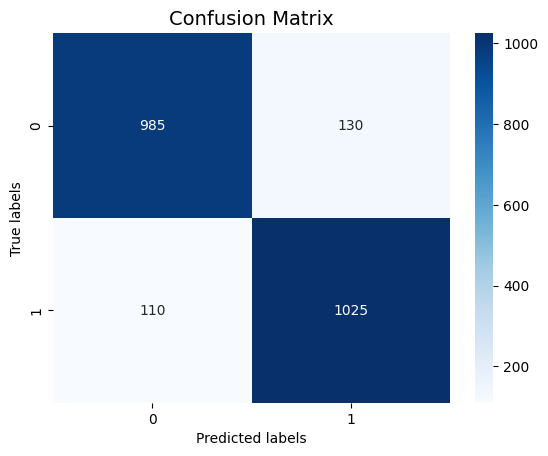

In [ ]:
# Evaluation metrics
evaluation(logit_model)

# Training with SVM, KNN models

In [ ]:
# Training with SVM
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Train Accuracy: 0.8728888888888889

Test Accuracy: 0.8782222222222222

Confusion Matrix:
 [[ 915  200]
 [  74 1061]]

Classification report of SVC(probability=True) model is
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1115
           1       0.84      0.93      0.89      1135

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250


AUC Score is 0.9251907311194959

Heatmap of Confusion Matrix


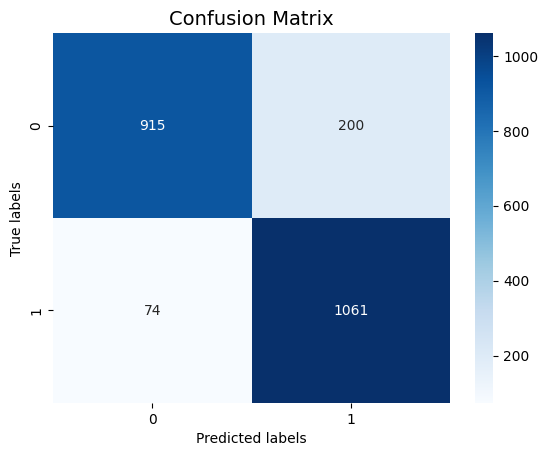

In [ ]:
evaluation(svm_model)

In [ ]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Train Accuracy: 0.9558518518518518

Test Accuracy: 0.9355555555555556

Confusion Matrix:
 [[ 970  145]
 [   0 1135]]

Classification report of KNeighborsClassifier() model is
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1115
           1       0.89      1.00      0.94      1135

    accuracy                           0.94      2250
   macro avg       0.94      0.93      0.94      2250
weighted avg       0.94      0.94      0.94      2250


AUC Score is 0.9672155824657751

Heatmap of Confusion Matrix


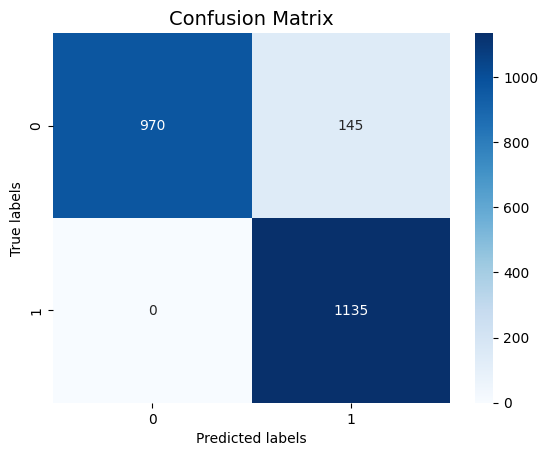

In [ ]:
evaluation(knn_model)

# Tuning the parameters of the model

In [ ]:
# Tuning the parameters of a model
n_neighbors = range(1,30,2)
list(n_neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [ ]:
from sklearn import metrics
train_scores = {}
test_scores = {}

for k in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  train_scores[k] = knn.score(x_train, y_train)
  test_scores[k] = metrics.accuracy_score(y_test, y_pred)

In [ ]:
scores = pd.concat([pd.Series(train_scores, name='train_scores'), pd.Series(test_scores, name='test_scores')], axis=1)
scores.reset_index(inplace=True)
scores.rename(columns={'index':'n_neighbors'}, inplace=True)
scores

,n_neighbors,train_scores,test_scores
0,1,1.000000,0.968000
1,3,0.974222,0.951556
2,5,0.955852,0.935556
3,7,0.936444,0.916889
4,9,0.921630,0.906222
5,11,0.911556,0.907556
6,13,0.906074,0.900889
7,15,0.897630,0.896444
8,17,0.894519,0.894222
9,19,0.892000,0.891556


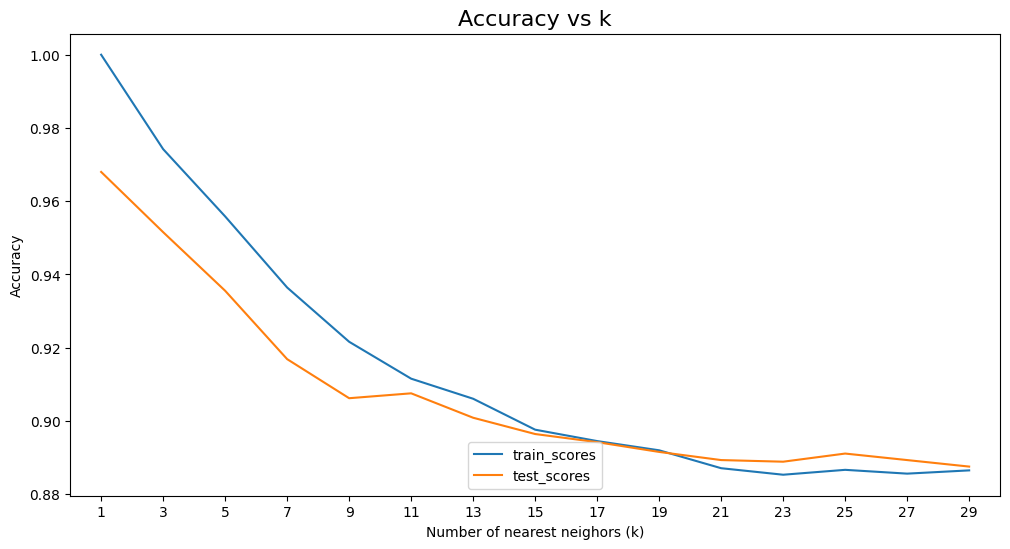

In [ ]:
# Plotting the graph accuracy vs k
plt.figure(figsize=(12,6))
plt.ylabel('Accuracy')
plt.xlabel('Number of nearest neighors (k)')
plt.title('Accuracy vs k', fontsize=16)
plt.xticks(scores['n_neighbors'])
plt.xlim([0,30])

sns.lineplot(data=pd.melt(scores, ['n_neighbors']), x='n_neighbors', y='value',hue='variable')
plt.legend(loc='lower center')

In [ ]:
# Using GridSearch to test in many combinations
n_neighbors = list(range(1,15,2))
grid_params = {'n_neighbors': n_neighbors,
               'weights' : ['uniform','distance'],
               'p': [1,2,3]}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1)
gs_res = gs.fit(x_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [ ]:
gs_res.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [ ]:
gs.best_score_

0.9758518518518517

In [ ]:
knn_model1 = KNeighborsClassifier(n_neighbors=1, p=1)
knn_model1.fit(x_train, y_train)
knn_model1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

Train Accuracy: 1.0

Test Accuracy: 0.9786666666666667

Confusion Matrix:
 [[1067   48]
 [   0 1135]]

Classification report of KNeighborsClassifier(n_neighbors=1, p=1) model is
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1115
           1       0.96      1.00      0.98      1135

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250


AUC Score is 0.97847533632287

Heatmap of Confusion Matrix


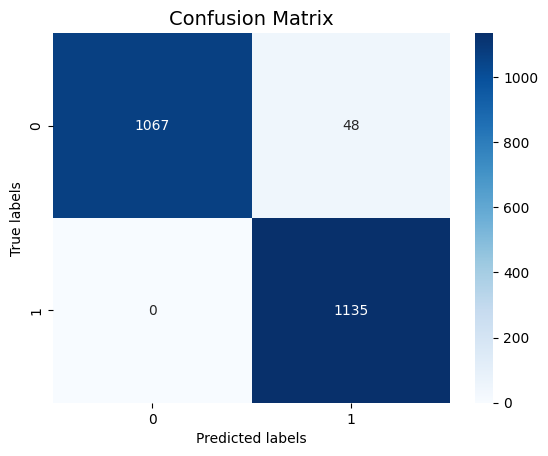

In [ ]:
evaluation(knn_model1)